In [69]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import fftpack
from scipy.fftpack import fft2, ifft2

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z = 3.4661629670697414


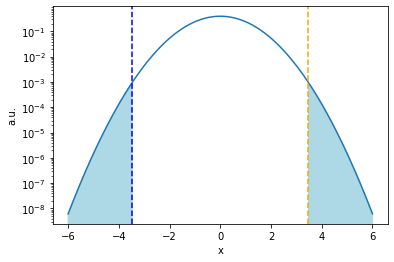

p-value = 0.0005279431738299246


In [70]:
x0 = 15.
mu = 6.3
sigma = np.sqrt(6.3)

# determine the Z score
Z = abs(x0 - mu) / sigma
print("Z =", Z)

xs = np.linspace(-6, +6, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("x")
plt.yscale("log")
plt.show()

# calculate the p-value as the sum of the left tail + the right tail
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("p-value =", pvalue)

# p_value < 0.05/2. So 15 is signficantly different.

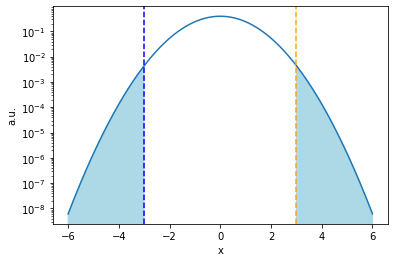

p-value = 0.0026997960632601965


In [71]:
# determine the Z score
Z = 3

xs = np.linspace(-6, +6, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("x")
plt.yscale("log")
plt.show()

# calculate the p-value as the sum of the left tail + the right tail
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("p-value =", pvalue)

# p_value < 0.05/2. So 15 is signficantly different.

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -0.7573995876275257


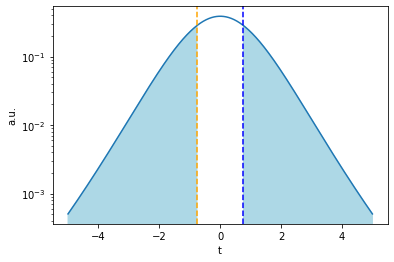

p-value = 0.4681758060603869


In [72]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
sigma_pre = np.sqrt(np.var(pre, ddof=1))
pre_mean = np.mean(pre)

post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
sigma_post = np.sqrt(np.var(post, ddof=1))
post_mean = np.mean(post)

sigma = np.sqrt(((sigma_pre**2)+(sigma_post**2))/2)
n = len(pre) # the size of the data sample

# calculate the test statistics
T = (pre_mean - post_mean) / (sigma / np.sqrt(2/n))
print("T =", T)

# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.yscale("log")


plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

# Since the p-value is not  <𝛼/2 , we accept the null hypothesis.
# So the change in blood pressures within our sample was not statistically significant.

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

In [73]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

--2022-01-16 18:35:38--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3vigxoqayo389uc/populations.txt [following]
--2022-01-16 18:35:48--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc013d5a622d172b964ad628fcc8.dl.dropboxusercontent.com/cd/0/inline/Bd6LO8E1uK5uRVZ3ymQkq2AH0AElndcPnIz0bVRaB-o4duio99vd_Pvzc3BKM37crY5PMWOOiXSUGoUm_5tCjMG-F2qnWfPbocK2C5leLWAipWR5hBYDEV0qEHuGWVcigzFH1rCyLdvd1DjK2XtJkydR/file# [following]
--2022-01-16 18:35:49--  https://uc013d5a622d172b964ad628fcc8.dl.dropboxusercontent.com/cd/0/inline/Bd6LO8E1uK5uRVZ3ymQkq2AH0AElndcPnIz0bVRaB-o4duio99vd_Pvzc3BKM37crY5PMWOOiXSUGo

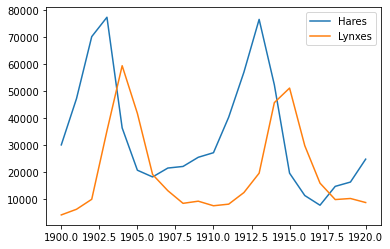

In [74]:
# reading data
file = np.loadtxt('populations.txt.1', dtype='float', skiprows=1)
file

year = file[:,0]
hares = file[:,1]
lynxes = file[:,2]

plt.plot(year,hares)
plt.plot(year,lynxes)
plt.legend(["Hares","Lynxes"])

Peak frequency_hares: 5.0072605277652595e-05
Peak frequency_lynxes: 5.0072605277652595e-05


[]

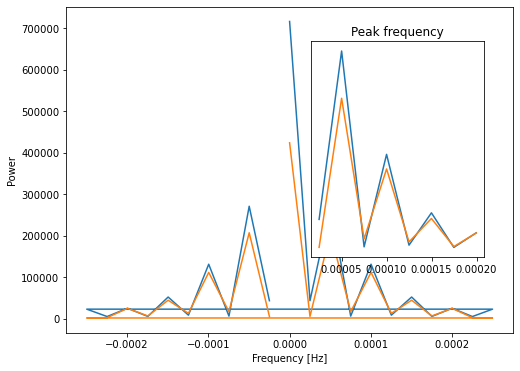

In [75]:
# The FFT of the signal
hares_fft = fftpack.fft(hares)
lynxes_fft = fftpack.fft(lynxes)

# And the power (sig_fft is of complex dtype)
power_hares = np.abs(hares_fft)# these are the "weights" of the Fourier components for each discrete frequency interval
power_lynxes = np.abs(lynxes_fft)

# The return the corresponding frequencies
sample_freq_hares = fftpack.fftfreq(hares.size, d=year)
sample_freq_lynxes = fftpack.fftfreq(lynxes.size, d=year)

# Plot the FFT power
plt.figure(figsize=(8, 6))
plt.plot(sample_freq_hares, power_hares)
plt.plot(sample_freq_lynxes, power_lynxes)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

# Find the peak frequency: focus only on only the positive frequencies
pos_mask_hares = np.where(sample_freq_hares > 0)
pos_mask_lynxes = np.where(sample_freq_lynxes > 0)

freqs_hares = sample_freq_hares[pos_mask_hares]
freqs_lynxes = sample_freq_lynxes[pos_mask_lynxes]

powes_hares = power_hares[pos_mask_hares]
powes_lynxes = power_lynxes[pos_mask_lynxes]

# find the max of freqs array
peak_freq_hares = freqs_hares[powes_hares.argmax()]
print("Peak frequency_hares:", peak_freq_hares)

peak_freq_lynxes = freqs_lynxes[powes_lynxes.argmax()]
print("Peak frequency_lynxes:", peak_freq_lynxes)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs_hares[:8], powes_hares[:8])
plt.plot(freqs_lynxes[:8], powes_lynxes[:8])
plt.setp(axes, yticks=[])

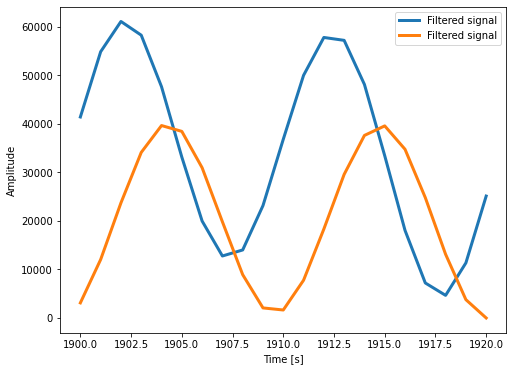

In [76]:
high_freq_fft_hares = hares_fft.copy()
high_freq_fft_lynxes = lynxes_fft.copy()

# filter (set to zero) all high frequency components that are larger than peak_freq
high_freq_fft_hares[np.abs(sample_freq_hares) > peak_freq_hares] = 0
high_freq_fft_lynxes[np.abs(sample_freq_lynxes) > peak_freq_lynxes] = 0

# calculate the Inverse Fast Fourier Transform
filtered_sig_hares = fftpack.ifft(high_freq_fft_hares)
filtered_sig_lynxes = fftpack.ifft(high_freq_fft_lynxes)

# only take the real part
real_filtered_signal_hares = np.real(filtered_sig_hares)
real_filtered_signal_lynxes = np.real(filtered_sig_lynxes)

# plot the result of the IFFT
plt.figure(figsize=(8, 6))

#plt.plot(year, hares, label='Original signal')
#plt.plot(year, lynxes, label='Original signal')

plt.plot(year, real_filtered_signal_hares, linewidth=3, label='Filtered signal')
plt.plot(year, real_filtered_signal_lynxes, linewidth=3, label='Filtered signal')

plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

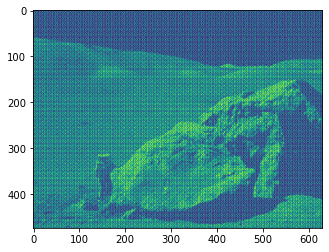

In [77]:
# import the original image
O_im = plt.imread('moonlanding.png')
plt.imshow(O_im)

Text(0.5, 1.0, 'the spectrum (Fourier transform of) the image')

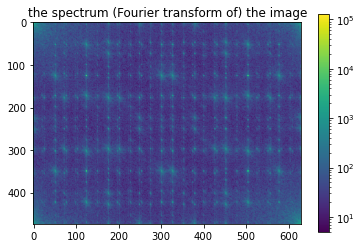

In [78]:
# performs a 2D FFT
fft2_O_im = fftpack.fft2(O_im)

# Plot the spectrum (Fourier transform of) the image
from matplotlib.colors import LogNorm
plt.imshow(np.abs(fft2_O_im), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('the spectrum (Fourier transform of) the image')

Text(0.5, 1.0, 'filtered Spectrum')

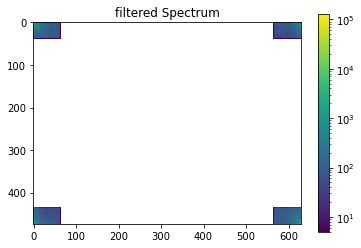

In [79]:
# set the noise regions to zero. 

# for rows noise approximately begin from about 50 and finish in 570. 
# So 50/620=0.08 is the part without noise in rows.

# for columns noise approximately begin from about 50 and finish in 440. 
# So 50/500=0.1 is the part without noise in columns. 

fft2_O_im_copy = fft2_O_im.copy()
shape_im = fft2_O_im_copy.shape
fft2_O_im_copy[int(shape_im[0]*(0.08)):int(shape_im[0]*(1-0.08))] = 0 # rows
fft2_O_im_copy[:, int(shape_im[1]*(0.1)):int(shape_im[1]*(1-0.1))] = 0 # column

plot_spectrum(fft2_O_im_copy)
plt.title('filtered Spectrum')

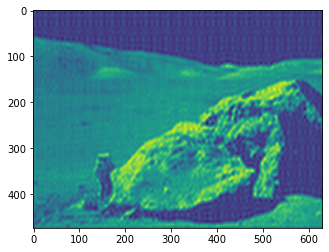

In [80]:
# the inverse Fourier transform to plot the resulting image.
f_im = fftpack.ifft2(fft2_O_im_copy).real
plt.imshow(f_im)